In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [2]:
!pip -q install sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 11.3 MB/s eta 0:00:00


In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
! wget https://raw.githubusercontent.com/rizalespe/Dataset-Sentimen-Analisis-Bahasa-Indonesia/master/dataset_komentar_instagram_cyberbullying.csv

--2024-11-12 02:39:27--  https://raw.githubusercontent.com/rizalespe/Dataset-Sentimen-Analisis-Bahasa-Indonesia/master/dataset_komentar_instagram_cyberbullying.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65494 (64K) [text/plain]
Saving to: ‘dataset_komentar_instagram_cyberbullying.csv’

dataset_komentar_in 100%[===================>]  63.96K  --.-KB/s    in 0.003s  

2024-11-12 02:39:27 (20.1 MB/s) - ‘dataset_komentar_instagram_cyberbullying.csv’ saved [65494/65494]



In [7]:
data = pd.read_csv('/content/dataset_komentar_instagram_cyberbullying.csv')
data

,Id,Sentiment,Instagram Comment Text
0,1,negative,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...
1,2,negative,Geblek lo tata...cowo bgt dibela2in balikan......
2,3,negative,Kmrn termewek2 skr lengket lg duhhh kok labil ...
3,4,negative,"Intinya kalau kesel dengan ATT nya, gausah ke ..."
4,5,negative,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha..."
...,...,...,...
395,396,positive,Bangga sama suami yg selalu ingat istri disela...
396,397,positive,Apaoun pekerjaannya yg penting halal u tuk men...
397,398,positive,Gojek itu mayoritas pegangguran yang lama gak ...
398,399,positive,<USERNAME> aslinya cantik dan ayu loh mbak kr...


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      400 non-null    int64 
 1   Sentiment               400 non-null    object
 2   Instagram Comment Text  400 non-null    object
dtypes: int64(1), object(2)
memory usage: 9.5+ KB


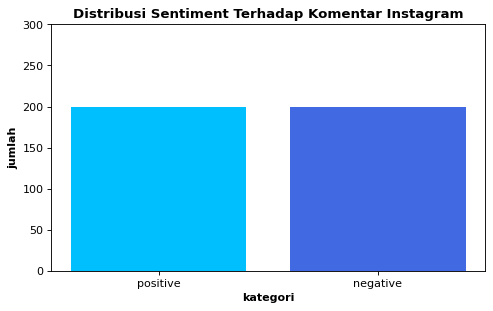

In [13]:
height = data['Sentiment'].value_counts()
labels = ('positive', 'negative')
y_pos = np.arange(len(labels))

plt.figure(figsize=(7,4), dpi=80)
plt.ylim(0, 300)
plt.title('Distribusi Sentiment Terhadap Komentar Instagram', fontweight='bold')
plt.xlabel('kategori', fontweight='bold')
plt.ylabel('jumlah', fontweight='bold')
plt.bar(y_pos, height, color=['deepskyblue', 'royalblue', 'skyblue'])
plt.xticks(y_pos, labels)
plt.show()

In [14]:
import re
def casefolding(text):
  text = text.lower()
  text = re.sub(r'https?:///\S+www\.S\+', '', text)
  text = re.sub(r'[-+]?[0-9]+', '', text)
  text = re.sub(r'[^\w\s]', '', text)
  text = text.strip()
  return text

In [15]:
raw_sample = data['Instagram Comment Text'].iloc[5]
case_folding = casefolding(raw_sample)

print('Raw data\t: ', raw_sample)
print('Case folding\t: ', case_folding)

Raw data	:  Pantesan di tinggalin laki, ya lakinya juga mikir kali kalau perempuannya kayagni. Ngurus diri aja dia gak becus gimana ngurus anak, mending anak sama bapake nya aja bener didiknya
Case folding	:  pantesan di tinggalin laki ya lakinya juga mikir kali kalau perempuannya kayagni ngurus diri aja dia gak becus gimana ngurus anak mending anak sama bapake nya aja bener didiknya


In [16]:
!wget https://raw.github.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv

--2024-11-12 03:16:41--  https://raw.github.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv
Resolving raw.github.com (raw.github.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.github.com (raw.github.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv [following]
--2024-11-12 03:16:41--  https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80969 (79K) [text/plain]
Saving to: ‘key_norm.csv’

key_norm.csv        100%[===================>]  79.07K  --.-KB/s    in 0.004s  

2024-11-12 03

In [17]:
key_norm = pd.read_csv('key_norm.csv')
print(key_norm.head())
key_norm.shape

   _id      singkat       hasil
0    1         abis       habis
1    2       accent     tekanan
2    3       accept      terima
3    4     accident  kecelakaan
4    5  achievement    prestasi


(3720, 3)

In [18]:
def text_normalize(text):
  text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] if (key_norm['singkat'] == word).any() else word for word in text.split()])
  text = str.lower(text)
  return text

In [20]:
raw_sample = data['Instagram Comment Text'].iloc[5]
case_folding = casefolding(raw_sample)
normalize = text_normalize(case_folding)

print('Raw data\t: ', raw_sample)
print('Case folding\t: ', case_folding)
print('Word normalize\t: ', normalize)

Raw data	:  Pantesan di tinggalin laki, ya lakinya juga mikir kali kalau perempuannya kayagni. Ngurus diri aja dia gak becus gimana ngurus anak, mending anak sama bapake nya aja bener didiknya
Case folding	:  pantesan di tinggalin laki ya lakinya juga mikir kali kalau perempuannya kayagni ngurus diri aja dia gak becus gimana ngurus anak mending anak sama bapake nya aja bener didiknya
Word normalize	:  pantesan di tinggalin laki ya lakinya juga berfikir kali kalau perempuannya kayagni ngurus diri saja dia tidak becus bagaimana ngurus anak mending anak sama bapake nya saja bener didiknya


In [23]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
stopwords_ind = stopwords.words('indonesian')

In [24]:
more_stopword = ['geblek', 'tolol', 'bangsat', 'username']
stopwords_ind = stopwords_ind + more_stopword

def remove_stopwords(text):
  clean_words = []
  text = text.split()
  for word in text:
    if word not in stopwords_ind:
      clean_words.append(word)
  return ' '.join(clean_words)

In [31]:
raw_sample = data['Instagram Comment Text'].iloc[0]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stopwords(case_folding)

print('Raw data\t: ', raw_sample)
print('Case folding\t: ', case_folding)
print('Stopword removal\t: ', stopword_removal)

Raw data	:   <USERNAME> TOLOL!! Gak ada hubungan nya keguguran dgn pake hijab syar'i yg lo bilang bayi nya kepanasan didalem gak ada hubungan nya woyyyy!! Otak sama jempol lo gak singkron sih ya jadinya asal nulis komentar!
Case folding	:  username tolol gak ada hubungan nya keguguran dgn pake hijab syari yg lo bilang bayi nya kepanasan didalem gak ada hubungan nya woyyyy otak sama jempol lo gak singkron sih ya jadinya asal nulis komentar
Stopword removal	:  gak hubungan nya keguguran dgn pake hijab syari yg lo bilang bayi nya kepanasan didalem gak hubungan nya woyyyy otak jempol lo gak singkron sih ya nulis komentar


In [32]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()
def stemming(text):
  text = stemmer.stem(text)
  return text

In [33]:
raw_sample = data['Instagram Comment Text'].iloc[5]
case_folding = casefolding(raw_sample)
normalize = text_normalize(case_folding)
stopword_removal = remove_stopwords(normalize)
text_stemming = stemming(stopword_removal)

print('Raw data\t: ', raw_sample)
print('Case folding\t: ', case_folding)
print('Word normalize\t: ', normalize)
print('Stopword removal\t: ', stopword_removal)
print('Stemming\t: ', text_stemming)

Raw data	:  Pantesan di tinggalin laki, ya lakinya juga mikir kali kalau perempuannya kayagni. Ngurus diri aja dia gak becus gimana ngurus anak, mending anak sama bapake nya aja bener didiknya
Case folding	:  pantesan di tinggalin laki ya lakinya juga mikir kali kalau perempuannya kayagni ngurus diri aja dia gak becus gimana ngurus anak mending anak sama bapake nya aja bener didiknya
Word normalize	:  pantesan di tinggalin laki ya lakinya juga berfikir kali kalau perempuannya kayagni ngurus diri saja dia tidak becus bagaimana ngurus anak mending anak sama bapake nya saja bener didiknya
Stopword removal	:  pantesan tinggalin laki ya lakinya berfikir kali perempuannya kayagni ngurus becus ngurus anak mending anak bapake nya bener didiknya
Stemming	:  pantesan tinggalin laki ya laki berfikir kali perempuan kayagni ngurus becus ngurus anak mending anak bapake nya bener didik


In [34]:
def text_preprocessing_process(text):
  text = casefolding(text)
  text = text_normalize(text)
  text = remove_stopwords(text)
  text = stemming(text)
  return text

In [35]:
%time
data['clean_text'] = data['Instagram Comment Text'].apply(text_preprocessing_process)

CPU times: user 14 µs, sys: 0 ns, total: 14 µs
Wall time: 19.3 µs


In [36]:
data

,Id,Sentiment,Instagram Comment Text,clean_text
0,1,negative,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...,hubung nya gugur pakai hijab syar bilang bayi ...
1,2,negative,Geblek lo tata...cowo bgt dibela2in balikan......,bodoh tatacowo banget bain balikanhadewwntar t...
2,3,negative,Kmrn termewek2 skr lengket lg duhhh kok labil ...,kemarin mewek skr lengket duhhh labil banget s...
3,4,negative,"Intinya kalau kesel dengan ATT nya, gausah ke ...",inti kesel att nya anak kasihan kembang psikis...
4,5,negative,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha...",hadewwwww permpuan lgsakit jiwaknp peran utama...
...,...,...,...,...
395,396,positive,Bangga sama suami yg selalu ingat istri disela...,bangga suami istri sela apa profesi kau juara ...
396,397,positive,Apaoun pekerjaannya yg penting halal u tuk men...,apaoun kerja halal tuk nafkah keluarga semangat
397,398,positive,Gojek itu mayoritas pegangguran yang lama gak ...,gojek mayoritas pegangguran kerja putus asaa t...
398,399,positive,<USERNAME> aslinya cantik dan ayu loh mbak kr...,asli cantik ayu loh mbak temu langsung sembak ...


In [37]:
x = data['clean_text']
y = data['Sentiment']

In [38]:
x

,clean_text
0,hubung nya gugur pakai hijab syar bilang bayi ...
1,bodoh tatacowo banget bain balikanhadewwntar t...
2,kemarin mewek skr lengket duhhh labil banget s...
3,inti kesel att nya anak kasihan kembang psikis...
4,hadewwwww permpuan lgsakit jiwaknp peran utama...
...,...
395,bangga suami istri sela apa profesi kau juara ...
396,apaoun kerja halal tuk nafkah keluarga semangat
397,gojek mayoritas pegangguran kerja putus asaa t...
398,asli cantik ayu loh mbak temu langsung sembak ...


In [39]:
y

,Sentiment
0,negative
1,negative
2,negative
3,negative
4,negative
...,...
395,positive
396,positive
397,positive
398,positive


In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer(ngram_range=(1,1))
tf_idf.fit(x)

TfidfVectorizer()

In [41]:
print(len(tf_idf.get_feature_names_out()))

2313


In [42]:
print(tf_idf.get_feature_names_out())

['aamiin' 'aammiinnn' 'abal' ... 'zholimi' 'zina' 'zzzzz']


In [43]:
x_tf_idf = tf_idf.transform(x).toarray()
x_tf_idf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [44]:
data_tf_idf = pd.DataFrame(x_tf_idf, columns=tf_idf.get_feature_names_out())
data_tf_idf

,aamiin,aammiinnn,abal,abang,abbey,abege,abiiis,abiss,abu,ac,...,yh,yoo,youtube,yra,yuk,yutub,zaman,zholimi,zina,zzzzz
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.237377,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
397,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
398,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
with open('tf_idf.pickle', 'wb') as output:
  pickle.dump(x_tf_idf, output)

In [47]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from joblib import dump

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x_tf_idf, y, test_size=0.2, random_state=50)

In [51]:
algorithms_svc = SVC()
model = algorithms_svc.fit(x_train, y_train)
dump(model, filename='model_1.joblib')

['model_1.joblib']

In [52]:
model_pred = model.predict(x_test)
model_pred

array(['negative', 'positive', 'negative', 'positive', 'positive',
       'negative', 'positive', 'negative', 'positive', 'positive',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'positive', 'positive', 'negative',
       'negative', 'positive', 'positive', 'negative', 'negative',
       'negative', 'positive', 'negative', 'negative', 'positive',
       'positive', 'negative', 'negative', 'positive', 'negative',
       'positive', 'positive', 'positive', 'negative', 'negative',
       'positive', 'negative', 'negative', 'negative', 'negative',
       'positive', 'negative', 'negative', 'positive', 'positive',
       'positive', 'negative', 'positive', 'negative', 'negative',
       'negative', 'positive', 'positive', 'negative', 'positive',
       'positive', 'positive', 'negative', 'negative', 'positive',
       'positive', 'negative', 'negative', 'positive', 'positive',
       'negative', 'positive', 'negative', 'positive', 'positi

In [53]:
y_test

,Sentiment
146,negative
332,positive
67,negative
362,positive
102,negative
...,...
55,negative
65,negative
16,negative
153,negative


In [59]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=50)

cv_accuracy = (cross_val_score(model, x_tf_idf, y, cv=cv, scoring='accuracy'))
avg_accuracy = np.mean(cv_accuracy)

prediksi_benar = (model_pred == y_test).sum()
prediksi_salah = (model_pred != y_test).sum()

print('Model Support Machine')
print('Jumlah Prediksi Benar\t:', prediksi_benar)
print('Jumlah Prediksi Salah\t:', prediksi_salah)

accuracy = (prediksi_benar / (prediksi_benar + prediksi_salah)) * 100
print('Akurasi Pengujian\t:', accuracy, '%' '\n')
print('Akurasi Setiap Split\t:', cv_accuracy)
print('Rata-rata Akurasi Pada Cross Validation: ', avg_accuracy)

Model Support Machine
Jumlah Prediksi Benar	: 68
Jumlah Prediksi Salah	: 12
Akurasi Pengujian	: 85.0 %

Akurasi Setiap Split	: [0.85   0.925  0.8875 0.925  0.8625 0.8625 0.875  0.875  0.9125 0.925 ]
Rata-rata Akurasi Pada Cross Validation:  0.89


In [60]:
algorithms_nb = MultinomialNB()
model = algorithms_nb.fit(x_train, y_train)
dump(model, filename='model_2.joblib')

['model_2.joblib']

In [61]:
model_pred = model.predict(x_test)
model_pred

array(['negative', 'positive', 'negative', 'positive', 'negative',
       'negative', 'positive', 'positive', 'positive', 'positive',
       'negative', 'negative', 'positive', 'negative', 'positive',
       'negative', 'negative', 'positive', 'positive', 'negative',
       'negative', 'positive', 'positive', 'negative', 'negative',
       'negative', 'positive', 'negative', 'negative', 'positive',
       'positive', 'negative', 'negative', 'positive', 'negative',
       'positive', 'positive', 'positive', 'negative', 'negative',
       'positive', 'negative', 'negative', 'negative', 'negative',
       'positive', 'negative', 'negative', 'positive', 'positive',
       'positive', 'negative', 'positive', 'negative', 'negative',
       'negative', 'positive', 'positive', 'negative', 'positive',
       'positive', 'positive', 'positive', 'negative', 'positive',
       'positive', 'negative', 'negative', 'positive', 'positive',
       'negative', 'positive', 'negative', 'positive', 'positi

In [62]:
y_test

,Sentiment
146,negative
332,positive
67,negative
362,positive
102,negative
...,...
55,negative
65,negative
16,negative
153,negative


In [63]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=50)

cv_accuracy = (cross_val_score(model, x_tf_idf, y, cv=cv, scoring='accuracy'))
avg_accuracy = np.mean(cv_accuracy)

prediksi_benar = (model_pred == y_test).sum()
prediksi_salah = (model_pred != y_test).sum()

print('Model Naive Bayes')
print('Jumlah Prediksi Benar\t:', prediksi_benar)
print('Jumlah Prediksi Salah\t:', prediksi_salah)

accuracy = (prediksi_benar / (prediksi_benar + prediksi_salah)) * 100
print('Akurasi Pengujian\t:', accuracy, '%' '\n')
print('Akurasi Setiap Split\t:', cv_accuracy)
print('Rata-rata Akurasi Pada Cross Validation: ', avg_accuracy)

Model Naive Bayes
Jumlah Prediksi Benar	: 65
Jumlah Prediksi Salah	: 15
Akurasi Pengujian	: 81.25 %

Akurasi Setiap Split	: [0.8125 0.9125 0.925  0.9375 0.875  0.875  0.825  0.85   0.9375 0.9   ]
Rata-rata Akurasi Pada Cross Validation:  0.885
